In [5]:
import os
import sys
import json
import torch
import numpy as np
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

%matplotlib inline

sys.path.append('../../')

In [6]:
from spleen.etl import SpleenDataset
from utils import custom_transforms

In [35]:
root_dir = "/export/scratch3/bvdp/segmentation/data/Task09_Spleen"
# root_dir = "/../Data/Task09_Spleen"
jsonname = "dataset.json"
use_cuda = True
best_dice = 0.65

image_size = 256
image_depth = 48

transform_train = custom_transforms.Compose([
    custom_transforms.CropDepthwise(crop_size=image_depth, crop_mode='random'),
    custom_transforms.CustomResize(output_size=image_size),
#     custom_transforms.CropInplane(crop_size=crop_inplane, crop_mode='center'),
    custom_transforms.RandomBrightness(),
    custom_transforms.RandomContrast(),
    # custom_transforms.RandomElasticTransform3D_2(p=0.7),
    custom_transforms.RandomRotate3D(p=0.3)      
])

transform_val = custom_transforms.Compose([
    custom_transforms.CropDepthwise(crop_size=image_depth, crop_mode='random'),
    custom_transforms.CustomResize(output_size=image_size),
    # custom_transforms.CropInplane(crop_size=384, crop_mode='center')
    # custom_transforms.CropInplane(crop_size=crop_inplane, crop_mode='center')
])

train_dataset = SpleenDataset(root_dir, jsonname, image_size=image_size, slice_thickness=3, image_depth=32, is_training=True, augment=True, transform=transform_train)
val_dataset = SpleenDataset(root_dir, jsonname, image_size=image_size, slice_thickness=3, image_depth=32, is_training=False, augment=True, transform=transform_val)

# train_dataset = SpleenDataset(root_dir, jsonname, image_size=image_size, slice_thickness=3, image_depth=32, is_training=True, augment=True)
# val_dataset = SpleenDataset(root_dir, jsonname, image_size=image_size, slice_thickness=3, image_depth=32, is_training=False, augment=False)

Total Training data: 33
Total test data: 8


In [29]:
img, target = train_dataset[10]

In [37]:
img, target = val_dataset[5]

In [36]:
dl = DataLoader(train_dataset)

In [37]:
img, target = next(iter(dl))

In [30]:
img.shape, target.shape

((1, 48, 256, 256), (48, 256, 256))

In [12]:
# img

(array([1581883.,  328402.,  138953.,  196760.,  337588.,  363849.,
          48929.,   30479.,   30411.,   88474.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

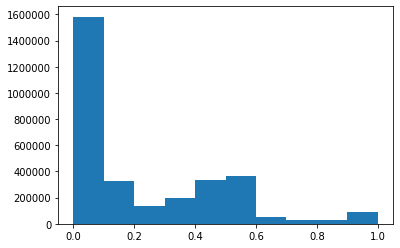

In [27]:
plt.hist(img.ravel())

In [31]:
np.where(target == 1)

(array([35, 35, 35, ..., 47, 47, 47]),
 array([139, 140, 140, ..., 184, 184, 184]),
 array([42, 40, 41, ..., 68, 69, 70]))

In [32]:
# target

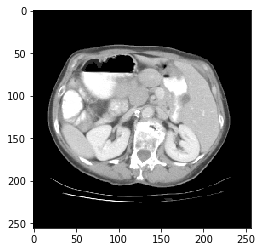

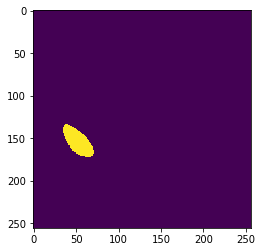

In [34]:
slice_i = 39
plt.imshow(img[0,slice_i], cmap='gray')
plt.figure()
plt.imshow(target[slice_i])